# Importing the required libraries

In [1]:
import numpy as np
import tensorflow 
from keras.datasets import mnist
from keras.models import Sequential 
from keras import layers
from keras.layers import Dense, Flatten 
from keras.layers import Conv2D 
from keras.optimizers import Adam
from keras. utils import np_utils 
import matplotlib.pyplot as plt

# Load data

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () 

In [3]:
print (x_train.shape) 
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

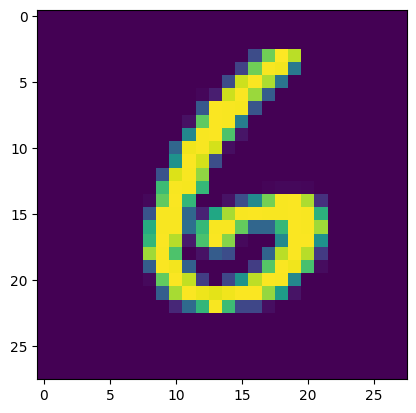

In [5]:
plt.imshow(x_train[6000]) 

In [6]:
np.argmax(y_train[6000])

0

# Reshaping Dataset

In [7]:
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [8]:
number_of_classes = 10 

In [9]:
y_train = np_utils.to_categorical (y_train, number_of_classes)
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [10]:
model=Sequential()

In [11]:
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [14]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [15]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [19]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1)

1875/1875 [==============================] - 127s 68ms/step - loss: 0.0395 - accuracy: 0.9872 - val_loss: 0.0983 - val_accuracy: 0.9742


# Observing the metrics

In [ ]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.09910603612661362, 0.977400004863739]


# Test The Model

In [ ]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

[[9.1516389e-13 8.1778777e-19 2.4542002e-14 1.7823329e-07 5.2257418e-04
  5.8763407e-09 6.2800168e-17 3.1880148e-07 6.3142506e-03 9.9316275e-01]]


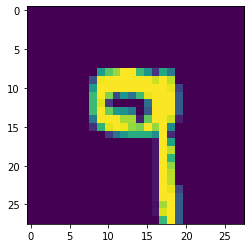

In [ ]:
plt.imshow(x_test[6000])

In [ ]:
import numpy as np
print(np.argmax(prediction, axis=1)) 

[9]


In [ ]:
np.argmax(y_test[6000:6001]) 

9

# Save The model

In [ ]:
model.save('models/mnistCNN.h5')

In [ ]:
cd models

In [ ]:
!tar -zcvf handwritten-digit-recognition-model_new.tgz mnistCNN.h5

mnistCNN.h5


# Cloud deploy

In [ ]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://jp-tok.ml.cloud.ibm.com",
    "apikey":"BHyalu2c7JN6n9cnvAVULvSKRYFVLMQ_m51toZ9Yk0nS"
}
client = APIClient(credentials)
client

In [ ]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:jp-tok:a/53f9f6400d0d44889534e8abcd2dfe39:0f4376b6-c944-4b27-b23e-48b54d8f4bbd::',
      'guid': '0f4376b6-c944-4b27-b23e-48b54d8f4bbd',
      'name': 'Watson Machine Learning-sp',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'digitrecognition',
    'scope': {'bss_account_id': '53f9f6400d0d44889534e8abcd2dfe39'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '63888f6f-d1ef-475c-a8d8-a2e4957bb673',
      'bucket_region': 'jp-tok-standard',
      'credentials': {'admin': {'access_key_id': '834b3358ebb945fb9ebbb4020cd2bf0e',
        'api_key': '2JONUuuPfYzZzPGzTp1J7dwwjNTpkOsyxdW5gx_vml3m',
        'secret_access_key': '1ed5b29fdd6c65b48ca72963b6177133ce51a7b23acdcaa5',
        'service_id': 'ServiceId-a2495f73-f36b-4fa1-9991-976f110c1a4f'},
       'editor': {'access_key_id': 'b56d445c54794369b2a4e0115e166605',
       

In [ ]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [ ]:
space_uid = guid_from_space_name(client,'digitrecognition')
print("Space UID = " + space_uid)

Space UID = aa24227a-9f01-493f-90e6-1b6132057fc6


In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [ ]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model='handwritten-digit-recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [ ]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-01T10:15:40.847Z',
  'id': '97d463b1-45ee-47f7-b8af-aed338794ce1',
  'modified_at': '2022-11-01T10:15:44.197Z',
  'name': 'CNN Digit recognition model',
  'owner': 'IBMid-667000CZ2Y',
  'resource_key': '84636ddb-9fa8-47e4-8fa4-3c36731e2fe6',
  'space_id': 'aa24227a-9f01-493f-90e6-1b6132057fc6'},
 'system': {'warnings': []}}

In [ ]:
model_id = client.repository.get_model_id(model_details)
model_id

'97d463b1-45ee-47f7-b8af-aed338794ce1'

# TEST MODEL

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [ ]:
model = load_model("mnistCNN.h5")

In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): 
    return 0

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='is_QZGPyU8oxZr3W-td-LCHXS3QPMaWArILi18FdSyGT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittenimagerecognition-donotdelete-pr-8tlrnykut46vpi'
object_key = 'mnist-dataset-1024x424 (2).png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

In [ ]:
img = Image.open(streaming_body_1).convert("L") 
img = img.resize( (28,28) )

In [ ]:
img

In [ ]:
im2arr = np.array(img)
im2arr = im2arr.reshape(1, 28, 28, 1) 

In [ ]:
pred = model.predict(im2arr)
print(pred)

[[1.0000000e+00 5.3912803e-17 3.9648812e-11 2.0051219e-16 5.1053910e-18
  2.9315760e-12 7.0849349e-13 2.0999634e-16 2.9204243e-09 7.4729778e-11]]


In [ ]:
print(np.argmax(pred, axis=1)) 

[0]
